In [36]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
def change(x):
    if x=='..':
        return 0
    else:
        return x
%matplotlib inline


pd.options.display.max_columns = 200

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [7]:
sc_hpi = pd.read_csv('sc_hpi.csv')
sc_hpi2 = pd.read_csv('sc_hpi2.csv')
sc_pcpi = pd.read_csv('sc_pcpi.csv')

In [27]:
sc_unemp = pd.read_csv('sc_unemp.csv')
sc_unemp['DATE']=sc_unemp['DATE'].apply(lambda x:pd.to_datetime(x))

(array([480, 492, 504, 516, 528, 540, 552, 564, 576, 588]),
 <a list of 10 Text xticklabel objects>)

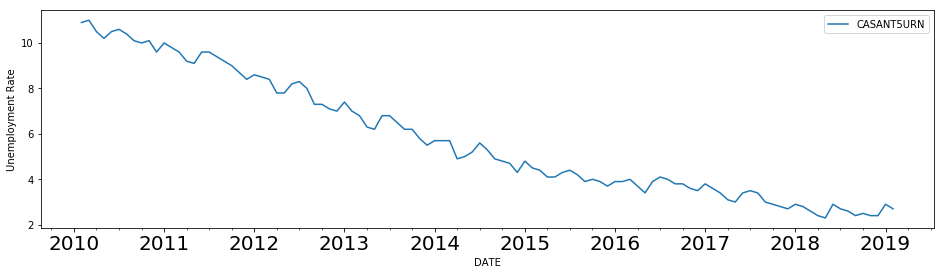

In [46]:
sc_unemp[sc_unemp['DATE']>pd.to_datetime('2010-01-01')].plot('DATE','CASANT5URN',figsize=(16,4))
plt.ylabel('Unemployment Rate')
plt.xticks(size=20)

In [110]:
sc_unemp['dA'] = sc_unemp['CASANT5URN'] - sc_unemp['CASANT5URN'].shift(1)
sc_unemp['dA'] = sc_unemp['dA'].fillna(0)
sc_unemp['Month']=[i.month for i in sc_unemp['DATE']]
sc_unemp['Year']=[i.year for i in sc_unemp['DATE']]
sc_unemp['a']=[i - pd.to_datetime('2016-03-04') for i in  sc_unemp['DATE']]
sc_unemp['SB Year']=[0>sc_unemp['a'][i].days > -365 for i in range(len(sc_unemp))]
sc_unemp['Unemployment Rate']=sc_unemp['CASANT5URN']

In [99]:
i = pd.to_datetime('2010-01-04') - pd.to_datetime('2010-01-01')
i.days

3

Text(0.5, 1.0, 'Santa Clara Unemployment Rate by Month since 2009')

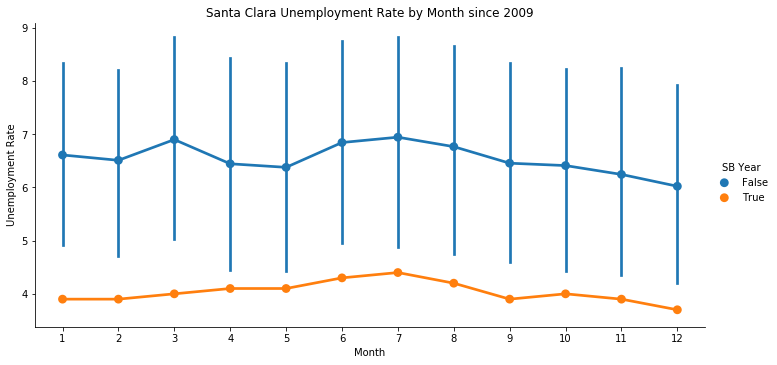

In [120]:
sb.catplot(x='Month',y='Unemployment Rate',data=sc_unemp[sc_unemp['DATE']>pd.to_datetime('2008-12-31')],kind='point',aspect=2,hue='SB Year')
plt.title('Santa Clara Unemployment Rate by Month since 2009')

In [114]:
sc_econ = pd.read_csv('sc_econ.csv')

In [115]:
sc_econ.columns=['Date','Economic Growth, %']
sc_econ['Date']=sc_econ['Date'].apply(lambda x:pd.to_datetime(x))
sc_econ['dA'] = sc_econ['Economic Growth, %'] - sc_econ['Economic Growth, %'].shift(1)
sc_econ['dA'] = sc_econ['dA'].fillna(0)
sc_econ['Month']=[i.month for i in sc_econ['Date']]
sc_econ['Year']=[i.year for i in sc_econ['Date']]
sc_econ['a']=[i - pd.to_datetime('2016-03-04') for i in  sc_econ['Date']]
sc_econ['SB Year']=[0>sc_econ['a'][i].days > -365 for i in range(len(sc_econ))]
sc_econ.head(4)

,Date,"Economic Growth, %",dA,Month,Year,a,SB Year
0,1990-02-01,5.05,0.00,2,1990,-9528 days,False
1,1990-03-01,4.23,-0.82,3,1990,-9500 days,False
2,1990-04-01,3.92,-0.31,4,1990,-9469 days,False
3,1990-05-01,3.67,-0.25,5,1990,-9439 days,False


Text(0.5, 1.0, 'Santa Clara Economic Growth %, by Month since 2009')

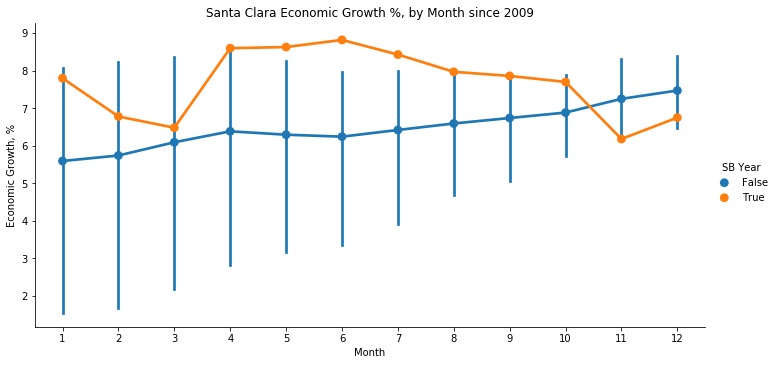

In [121]:
sb.catplot(x='Month',y='Economic Growth, %',data=sc_econ[sc_econ['Date']>pd.to_datetime('2008-12-31')],kind='point',aspect=2,hue='SB Year')
plt.title('Santa Clara Economic Growth %, by Month since 2009')

In [ ]:
decomposition = sm.tsa.seasonal_decompose(sc_unemp.set_index('DATE')['dA'],model='additive')
plt.rcParams["figure.figsize"] = (8,8)
f = decomposition.plot()

for i in f.axes:
    i.axvline(pd.Timestamp('2016-02-07'),color='r',ls='--',lw=1)